# QSO Cl's

In [1]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)

sys.path.insert(1, '/home/zcapjru/PhD/DEScls/xcell/mappers')

from mapper_base import MapperBase
import mapper_eBOSSQSO

from astropy.io import fits
from astropy.table import Table
import mapper_P15CMBK
import pyccl as ccl
import numpy as np
import pylab as plt
import pymaster as nmt
import healpy as hp

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
# Initialize binning scheme with 20 ells per bandpower
nside = 256
nside_mask = 256
#bands = nmt.NmtBin.from_nside_linear(nside, 20)
#ell_arr = bands.get_effective_ells()

In [3]:
ells = []
i = 11.5
while i <= 3 * nside:
    ells.append(round(i))
    #i = i*(1+i/(3 * nside))
    i = i+20*(1+i/240)
    
if ells[-1] <  3 * nside -1:   
    ells.append(3 * nside -1)
    
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [4]:
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [5]:
NGC_1_config = {'data_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_data-NGC-vDR16.fits'], 
          'random_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_random-NGC-vDR16.fits'],
          'z_edges':[0, 1.5],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_NGC_1' }

NGC_2_config = {'data_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_data-NGC-vDR16.fits'], 
          'random_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_random-NGC-vDR16.fits'],
          'z_edges':[1.5, 3],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_NGC_2'  }

SGC_1_config = {'data_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_data-SGC-vDR16.fits'], 
          'random_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_random-SGC-vDR16.fits'],
          'z_edges':[0, 1.5],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_SGC_1' }

SGC_2_config = {'data_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_data-SGC-vDR16.fits'], 
          'random_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_random-SGC-vDR16.fits'],
          'z_edges':[1.5, 3],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_SGC_1'  }

In [6]:
NGC_1_maps = mapper_eBOSSQSO.MappereBOSSQSO(NGC_1_config)
NGC_2_maps = mapper_eBOSSQSO.MappereBOSSQSO(NGC_2_config)
SGC_1_maps = mapper_eBOSSQSO.MappereBOSSQSO(SGC_1_config)
SGC_2_maps = mapper_eBOSSQSO.MappereBOSSQSO(SGC_2_config)

In [7]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.049, h=0.67, sigma8=0.81, n_s=0.96)
b_ngc = 2.37*np.ones(50) 
b_sgc = 2.32 *np.ones(50) 

In [8]:
NGC_nz_1 = NGC_1_maps.get_nz()
NGC_nz_2 = NGC_2_maps.get_nz()
SGC_nz_1 = SGC_1_maps.get_nz()
SGC_nz_2 = SGC_2_maps.get_nz()

NGC_z_1 = NGC_nz_1[1]
NGC_dNdz_1 = NGC_nz_1[0]

NGC_z_2 = NGC_nz_2[1]
NGC_dNdz_2 = NGC_nz_2[0]

SGC_z_1 = SGC_nz_1[1]
SGC_dNdz_1 = SGC_nz_1[0]

SGC_z_2 = SGC_nz_2[1]
SGC_dNdz_2 = SGC_nz_2[0]

NGC_quasar1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(NGC_z_1,NGC_dNdz_1), bias=(NGC_z_1,b_ngc))
NGC_quasar2 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(NGC_z_2,NGC_dNdz_2), bias=(NGC_z_2,b_ngc))
SGC_quasar1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(SGC_z_1,NGC_dNdz_1), bias=(SGC_z_1,b_sgc))
SGC_quasar2 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(SGC_z_2,NGC_dNdz_2), bias=(SGC_z_2,b_sgc))
CMB_shear = ccl.CMBLensingTracer(cosmo, 1100)

In [9]:
#ell = np.arange(2, 2000)
NGC_theory_11 = ccl.angular_cl(cosmo, NGC_quasar1, NGC_quasar1, ell_arr) 
NGC_theory_12 = ccl.angular_cl(cosmo, NGC_quasar1, NGC_quasar2, ell_arr) 
NGC_theory_22 = ccl.angular_cl(cosmo, NGC_quasar2, NGC_quasar2, ell_arr) 

SGC_theory_11 = ccl.angular_cl(cosmo, SGC_quasar1, SGC_quasar1, ell_arr) 
SGC_theory_12 = ccl.angular_cl(cosmo, SGC_quasar1, SGC_quasar2, ell_arr) 
SGC_theory_22 = ccl.angular_cl(cosmo, SGC_quasar2, SGC_quasar2, ell_arr) 

NGC_shear_theory_1 = ccl.angular_cl(cosmo, CMB_shear, NGC_quasar1, ell_arr) 
NGC_shear_theory_2 = ccl.angular_cl(cosmo, CMB_shear, NGC_quasar2, ell_arr) 
SGC_shear_theory_1 = ccl.angular_cl(cosmo, CMB_shear, SGC_quasar1, ell_arr) 
SGC_shear_theory_2 = ccl.angular_cl(cosmo, CMB_shear, SGC_quasar2, ell_arr) 

In [10]:
def compute_cl(f_a, f_b, wsp):
    # Compute the power spectrum (a la anafast) of the masked fields
    # Note that we only use n_iter=0 here to speed up the computation,
    # but the default value of 3 is recommended in general.
    cl_coupled = nmt.compute_coupled_cell(f_a, f_b)
    # Decouple power spectrum into bandpowers inverting the coupling matrix
    #cl_decoupled = wsp.decouple_cell(cl_coupled) #removed bias here

    return cl_coupled

In [11]:
NGC_f_1 =  NGC_1_maps.get_nmt_field()
NGC_f_2 =  NGC_2_maps.get_nmt_field()

/home/zcapjru/anaconda3/envs/PhD/lib/python3.8/site-packages/healpy/pixelfunc.py:475: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)


In [12]:
SGC_f_1 =  SGC_1_maps.get_nmt_field()
SGC_f_2 =  SGC_2_maps.get_nmt_field()

In [13]:
NGC_w_11 = nmt.NmtWorkspace()
NGC_w_11.compute_coupling_matrix(NGC_f_1, NGC_f_1, bands)
      
NGC_w_12 = nmt.NmtWorkspace()
NGC_w_12.compute_coupling_matrix(NGC_f_1, NGC_f_2, bands)

NGC_w_22 = nmt.NmtWorkspace()
NGC_w_22.compute_coupling_matrix(NGC_f_2, NGC_f_2, bands)

In [14]:
SGC_w_11 = nmt.NmtWorkspace()
SGC_w_11.compute_coupling_matrix(SGC_f_1, SGC_f_1, bands)

SGC_w_12 = nmt.NmtWorkspace()
SGC_w_12.compute_coupling_matrix(SGC_f_1, SGC_f_2, bands)

SGC_w_22 = nmt.NmtWorkspace()
SGC_w_22.compute_coupling_matrix(SGC_f_2, SGC_f_2, bands)

In [15]:
NGC_empirical_11 = compute_cl(NGC_f_1, NGC_f_1, NGC_w_11)
NGC_empirical_12 = compute_cl(NGC_f_1, NGC_f_2, NGC_w_12)
NGC_empirical_22 = compute_cl(NGC_f_2, NGC_f_2, NGC_w_22)

In [16]:
SGC_empirical_11 = compute_cl(SGC_f_1, SGC_f_1, SGC_w_11)
SGC_empirical_12 = compute_cl(SGC_f_1, SGC_f_2, SGC_w_12)
SGC_empirical_22 = compute_cl(SGC_f_2, SGC_f_2, SGC_w_22)

In [17]:
NGC_nl_11 = NGC_1_maps.get_nl_coupled() 
NGC_nl_22 = NGC_2_maps.get_nl_coupled() 

In [18]:
SGC_nl_11 = SGC_1_maps.get_nl_coupled() 
SGC_nl_22 = SGC_2_maps.get_nl_coupled() 

In [19]:
NGC_nn_empirical_11 = NGC_w_11.decouple_cell(NGC_empirical_11) - NGC_w_11.decouple_cell(NGC_nl_11)
NGC_nn_empirical_22 = NGC_w_11.decouple_cell(NGC_empirical_22) - NGC_w_22.decouple_cell(NGC_nl_22)

In [20]:
SGC_nn_empirical_11 = SGC_w_11.decouple_cell(SGC_empirical_11) - SGC_w_11.decouple_cell(SGC_nl_11)
SGC_nn_empirical_22 = SGC_w_22.decouple_cell(SGC_empirical_22) - SGC_w_22.decouple_cell(SGC_nl_22)

# Test cross-correlation

In [21]:
CMBK_config = {'file_klm':'/home/zcapjru/PhD/Data/COM_Lensing_2048_R2.00/dat_klm.fits', 
          'file_mask':'/home/zcapjru/PhD/Data/COM_Lensing_2048_R2.00/mask.fits.gz',
               'file_noise':'/home/zcapjru/PhD/Data/COM_Lensing_2048_R2.00/nlkk.dat', 'mask_name': 1,            
          'nside':nside}

In [24]:
CMBK_maps = mapper_P15CMBK.MapperP15CMBK(CMBK_config)

/home/zcapjru/anaconda3/envs/PhD/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


In [25]:
signal = CMBK_maps.get_signal_map()
mask = CMBK_maps.get_mask()
CMBK_f = CMBK_maps.get_nmt_field()

In [26]:
NGC1_k_w = nmt.NmtWorkspace()
NGC1_k_w.compute_coupling_matrix(NGC_f_1, CMBK_f, bands)

NGC2_k_w = nmt.NmtWorkspace()
NGC2_k_w.compute_coupling_matrix(NGC_f_2, CMBK_f, bands)

In [27]:
SGC1_k_w = nmt.NmtWorkspace()
SGC1_k_w.compute_coupling_matrix(SGC_f_1, CMBK_f, bands)

SGC2_k_w = nmt.NmtWorkspace()
SGC2_k_w.compute_coupling_matrix(SGC_f_2, CMBK_f, bands)

In [28]:
NGC1_k = compute_cl(NGC_f_1, CMBK_f, NGC1_k_w)
NGC2_k = compute_cl(NGC_f_2, CMBK_f, NGC2_k_w)
NGC1_k = NGC1_k_w.decouple_cell(NGC1_k)
NGC2_k = NGC2_k_w.decouple_cell(NGC2_k)

In [29]:
SGC1_k = compute_cl(SGC_f_1, CMBK_f, SGC1_k_w)
SGC2_k = compute_cl(SGC_f_2, CMBK_f, SGC2_k_w)
SGC1_k = SGC1_k_w.decouple_cell(SGC1_k)
SGC2_k = SGC2_k_w.decouple_cell(SGC2_k)

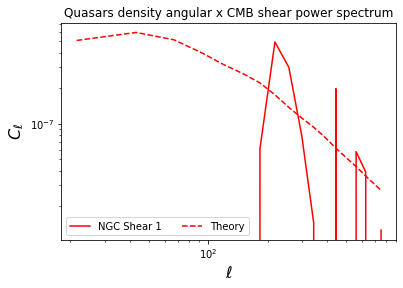

In [30]:
plt.plot(ell_arr, NGC1_k[0], 'r-', label='NGC Shear 1')
plt.plot(ell_arr, NGC_shear_theory_1, 'r--', label='Theory')

plt.loglog()
plt.title('Quasars density angular x CMB shear power spectrum')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

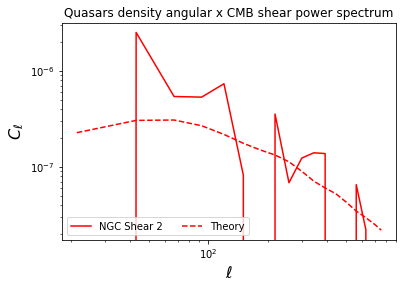

In [31]:
plt.plot(ell_arr, NGC2_k[0], 'r-', label='NGC Shear 2')
plt.plot(ell_arr, NGC_shear_theory_2, 'r--', label='Theory')
plt.loglog()
plt.title('Quasars density angular x CMB shear power spectrum')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

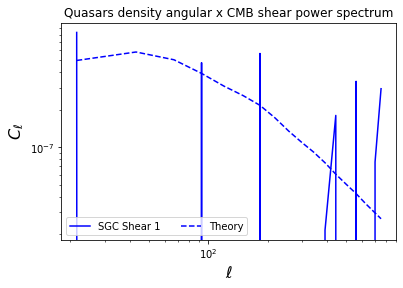

In [32]:
plt.plot(ell_arr, SGC1_k[0], 'b-', label='SGC Shear 1')
plt.plot(ell_arr, SGC_shear_theory_1, 'b--', label='Theory')

plt.loglog()
plt.title('Quasars density angular x CMB shear power spectrum')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

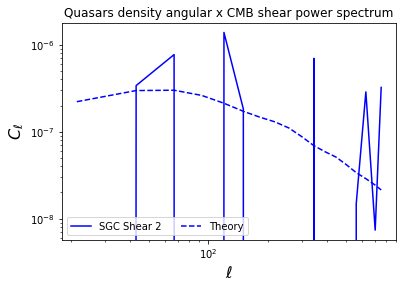

In [33]:
plt.plot(ell_arr, SGC2_k[0], 'b-', label='SGC Shear 2')
plt.plot(ell_arr, SGC_shear_theory_2, 'b--', label='Theory')

plt.loglog()
plt.title('Quasars density angular x CMB shear power spectrum')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()